In [1]:
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import psycopg2


conn = psycopg2.connect(
    host="localhost",
    dbname="postgres",
    user="postgres",
    password="postgres"
)

cur = conn.cursor()

df = pd.read_csv('products.csv')

In [26]:
df

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture Decoration,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction Tools Illumination,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed table bath,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [40]:
df.columns

Index(['product_id', 'product category', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [43]:
df.rename(columns={'product category': 'product_category'}, inplace=True)
df.columns

Index(['product_id', 'product_category', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [44]:
username = "postgres"      
password = "postgres" 
host = "localhost"         
port = "5432"             
database = "postgres"    

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "products"   
df.to_sql(table_name, engine, if_exists="replace", index=False)


951

In [4]:
df1 = pd.read_csv('customers.csv')

In [5]:
username = "postgres"      
password = "postgres" 
host = "localhost"         
port = "5432"             
database = "postgres"    

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "customers"   
df1.to_sql(table_name, engine, if_exists="replace", index=False)

441

In [8]:
df2 = pd.read_csv('geolocation.csv')

In [10]:
username = "postgres"      
password = "postgres" 
host = "localhost"         
port = "5432"             
database = "postgres"    

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "geolocation"   
df2.to_sql(table_name, engine, if_exists="replace", index=False)

163

In [12]:
df3 = pd.read_csv('order_items.csv')

In [18]:
username = "postgres"      
password = "postgres" 
host = "localhost"         
port = "5432"             
database = "postgres"    

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "order_items"   
df3.to_sql(table_name, engine, if_exists="replace", index=False)


650

In [16]:
df4 = pd.read_csv('orders.csv')

In [19]:
username = "postgres"      
password = "postgres" 
host = "localhost"         
port = "5432"             
database = "postgres"    

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "orders"   
df4.to_sql(table_name, engine, if_exists="replace", index=False)


441

In [20]:
df5 = pd.read_csv('payments.csv')

In [21]:
username = "postgres"      
password = "postgres" 
host = "localhost"         
port = "5432"             
database = "postgres"    

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "payments"   
df5.to_sql(table_name, engine, if_exists="replace", index=False)


886

In [23]:
df6 = pd.read_csv('sellers.csv')

In [24]:
username = "postgres"      
password = "postgres" 
host = "localhost"         
port = "5432"             
database = "postgres"    

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "sellers"   
df6.to_sql(table_name, engine, if_exists="replace", index=False)


95

In [71]:
# 1. List all unique cities where customers are located.

query = """select 
distinct geolocation_city
from geolocation """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['City'])

df

,City
0,sao jose das torres
1,capao da porteira
2,guarani das missões
3,barra de são miguel
4,cordislandia
...,...
8006,araguaiana
8007,porto rico do maranhao
8008,aguanil
8009,presidente sarney


In [72]:
#2. Count the number of orders placed in 2017.

query2 = """select count(order_id)
from orders
where extract(
    year from order_purchase_timestamp::timestamp
) = 2017"""

cur.execute(query2)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Quantity'])

df


,Quantity
0,45101


In [61]:
#3. Find the total sales per category.
query3 = """select 
upper(p.product_category),
round(sum(pa.payment_value)::numeric ,2) as sales
from products p 
left join order_items as o 
on p.product_id = o.product_id 
left join payments pa
on pa.order_id = o.order_id
group by p.product_category
order by sales desc"""

cur.execute(query3)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Category','Sales'])

df


,Category,Sales
0,BED TABLE BATH,1712553.67
1,HEALTH BEAUTY,1657373.12
2,COMPUTER ACCESSORIES,1585330.45
3,FURNITURE DECORATION,1430176.39
4,WATCHES PRESENT,1429216.68
...,...,...
69,PC GAMER,2174.43
70,HOUSE COMFORT 2,1710.54
71,CDS MUSIC DVDS,1199.43
72,FASHION CHILDREN'S CLOTHING,785.67


In [64]:
conn.rollback()

In [73]:
#4. Calculate the percentage of orders that were paid in installments.
query4 = """select 
100 * sum(case when payment_installments >= 1 then 1 else 0 
end) / count(*) 
from payments
"""

cur.execute(query4)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Percantage'])

df

,Percantage
0,99


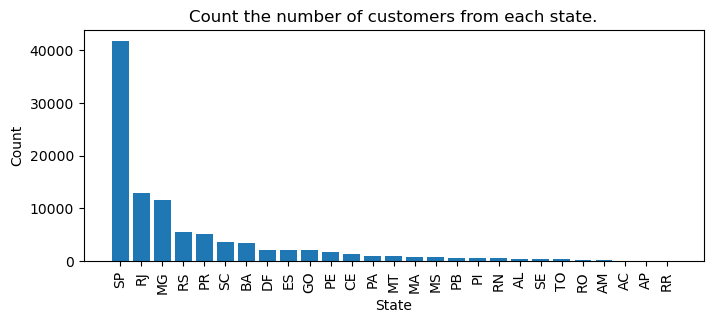

In [11]:
#5. Count the number of customers from each state.

query5 = """select 
count(customer_id),
customer_state as state
from customers
group by state
order by count(customer_id) desc
"""

cur.execute(query5)

data = cur.fetchall()


df = pd.DataFrame(data, columns = ['Quantity','State'])

plt.figure(figsize = (8,3))

plt.bar(df["State"], df["Quantity"])

plt.title('Count the number of customers from each state.')

plt.xlabel('State')

plt.ylabel('Count')

plt.xticks(rotation = 90)

plt.show()

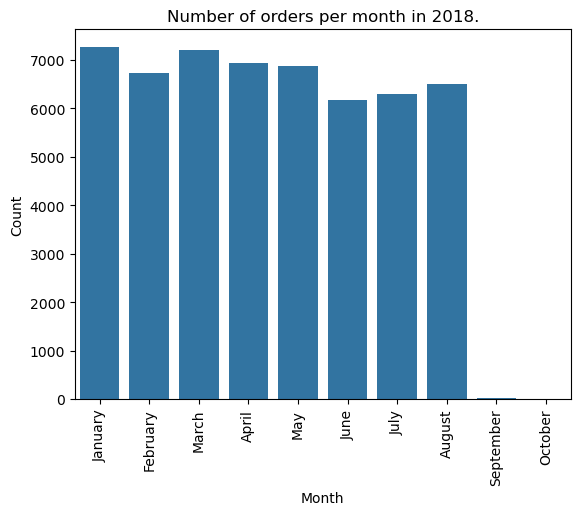

In [13]:
# 6. Calculate the number of orders per month in 2018.

query6 = """
SET lc_time = 'en_US';

select 
count(order_id) as quantity,
to_char(order_purchase_timestamp::timestamp, 'TMMonth') as month_name
from orders
where extract(year from order_purchase_timestamp::timestamp) = 2018
group by  month_name,extract(month from order_purchase_timestamp::timestamp)
order by extract(month from order_purchase_timestamp::timestamp)
"""

cur.execute(query6)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Quantity','Month'])

sns.barplot(x = df["Month"], y = df["Quantity"], data = df)

plt.title('Number of orders per month in 2018.')

plt.xlabel('Month')

plt.ylabel('Count')

plt.xticks(rotation = 90)

plt.show()


In [15]:
#7. Find the average number of products per order, grouped by customer city.

query7 = """with count_per_order as 
(select
o.order_id,
o.customer_id,
count(oi.order_id) as count_of_order_id
from orders as o 
inner join order_items as oi
on o.order_id = oi.order_id
group by o.order_id, o.customer_id)

select 
c.customer_city,
round(avg(count_per_order.count_of_order_id),2) as average_per_order
from customers as c
inner join count_per_order 
on c.customer_id  = count_per_order.customer_id
group by c.customer_city
order by average_per_order desc
"""
cur.execute(query7)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['customer_city','average_per_order'])

df

,customer_city,average_per_order
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
...,...,...
4105,sao joao evangelista,1.00
4106,araponga,1.00
4107,arraias,1.00
4108,zacarias,1.00


In [21]:
conn.rollback()

In [22]:
#8. Calculate total revenue contributed by each product category.

query8 = """with value as
(select 
p.order_id,
p.payment_value,
oi.product_id 
from payments p
inner join order_items as oi
on p.order_id = oi.order_id)

select
pd.product_category,
sum(v.payment_value) as value_per_category
from products pd
inner join value as v
on pd.product_id = v.product_id
group by pd.product_category
order by value_per_category desc
"""
cur.execute(query8)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['product_category','value_per_category'])

df

,product_category,value_per_category
0,bed table bath,1712553.67
1,HEALTH BEAUTY,1657373.12
2,computer accessories,1585330.45
3,Furniture Decoration,1430176.39
4,Watches present,1429216.68
...,...,...
69,PC Gamer,2174.43
70,House Comfort 2,1710.54
71,cds music dvds,1199.43
72,Fashion Children's Clothing,785.67


Corelation between price and number of times a product has been purchased is -0.10631625823860699


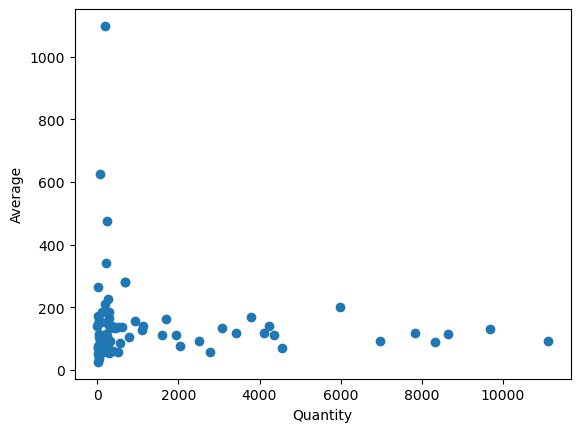

In [21]:
# 9. Identify the correlation between product price and the number of times a product has been purchased.

query9 = """select
p.product_category as product_category ,
count(oi.product_id) as quantity,
round(avg(oi.price)::numeric, 2) average
from products p 
inner join order_items oi 
on p.product_id = oi.product_id 
group by p.product_category
order by quantity desc
"""
cur.execute(query9)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['product_category','quantity', 'average'])

arr1 = df['quantity'].to_numpy(dtype=float)
arr2 = df['average'].to_numpy(dtype=float)

a = np.corrcoef(arr1, arr2)[0, 1]

print("Corelation between price and number of times a product has been purchased is", a)

plt.scatter(df['quantity'], df['average'])

plt.xlabel('Quantity')

plt.ylabel('Average')

plt.show()


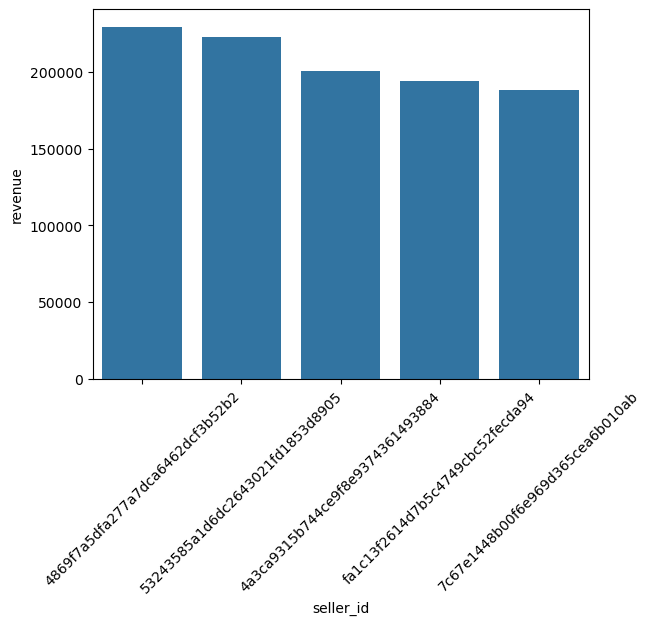

In [33]:
# 10. . Calculate the total revenue generated by each seller, and rank them by revenue.

query10 = """ select 
s.seller_id,
sum(oi.price),
dense_rank () over (order by sum(oi.price) desc  ) as rn
from sellers s
inner join order_items as oi
on s.seller_id = oi.seller_id 
group by s.seller_id"""

cur.execute(query10)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["seller_id","revenue","rank"])

df = df.head()

sns.barplot(x = "seller_id", y = "revenue", data = df)

plt.xticks(rotation = 45)

plt.show()                                




In [35]:
11# Calculate the moving average of order values for each customer over their order history.

query11 = """
select
    a.customer_id,
    a.order_purchase_timestamp,
    avg(a.payment_value) over (
        partition by a.customer_id
        order by a.order_purchase_timestamp
        rows between 2 preceding and current row
    ) as mov_avg
from (
    select
        o.customer_id,
        o.order_purchase_timestamp,
        p.payment_value
    from payments p
    inner join orders o
        on p.order_id = o.order_id
) as a
order by a.customer_id, a.order_purchase_timestamp;"""

cur.execute(query11)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["customer_id","order_purchase_timestamp","avg_move"])

df

,customer_id,order_purchase_timestamp,avg_move
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.12
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50


In [4]:
# 12 Calculate the cumulative sales per month for each year.

query12 = """
select year,
month,
total_payment,
sum(total_payment) over (order by year, month) as comulative_sales from
(select
    extract(year from o.order_purchase_timestamp::timestamp)  as year,
    extract(month from o.order_purchase_timestamp::timestamp) as month,
    sum(p.payment_value) as total_payment
from orders o
join payments p
    on o.order_id = p.order_id
group by
    extract(year from o.order_purchase_timestamp::timestamp),
    extract(month from o.order_purchase_timestamp::timestamp)
order by
    year, month ) as a """

cur.execute(query12)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Year","Month","Total_payment", "Comulative_payment"])

df

,Year,Month,Total_payment,Comulative_payment
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [20]:
conn.rollback()


In [17]:
# 13. Calculate the year-over-year growth rate of total sales.

query13 = """
 with a as (select
    extract(year from o.order_purchase_timestamp::timestamp)  as year,    
    sum(p.payment_value) as total_payment
from orders o
join payments p
    on o.order_id = p.order_id
group by
    extract(year from o.order_purchase_timestamp::timestamp)    
order by
    year)
select a.year,
(a.total_payment - lag(a.total_payment,1) over (order by year)) /
lag(a.total_payment, 1) over (order by a.year) * 100 from a
    
    """

cur.execute(query13)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Year","Year over Year growth by %"])

df


,Year,Year over Year growth by %
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'a9dc96b027d1252bbac0a9b72d837fc6'),
  Text(1, 0, '1d34ed25963d5aae4cf3d7f3a4cda173'),
  Text(2, 0, '4a06381959b6670756de02e07b83815f'),
  Text(3, 0, '1617b1357756262bfa56ab541c47bc16'),
  Text(4, 0, 'c6e2731c5b391845f6800c97401a43a9'),
  Text(5, 0, '3fd6777bbce08a352fddd04e4a7cc8f6'),
  Text(6, 0, 'ec5b2ba62e574342386871631fafd3fc'),
  Text(7, 0, 'f48d464a0baaea338cb25f816991ab1f'),
  Text(8, 0, 'e0a2412720e9ea4f26c1ac985f6a7358')])

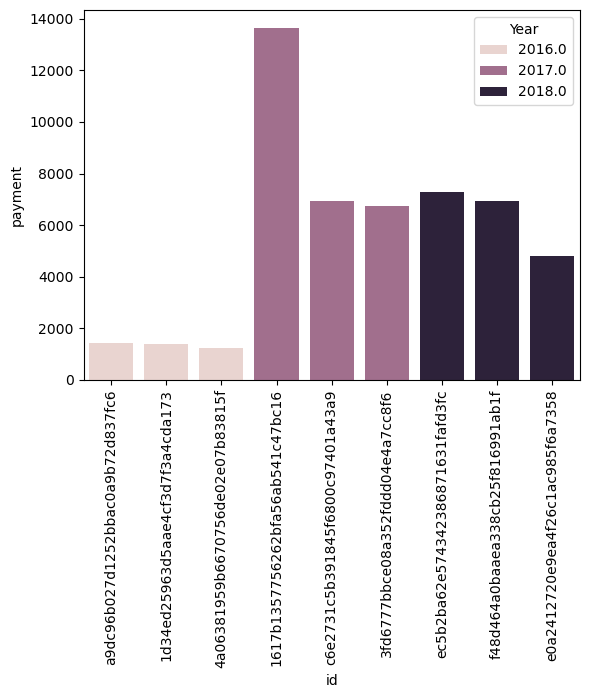

In [32]:
#14.5. Identify the top 3 customers who spent the most money in each year.

query13 = """
select
year,
customer_id,
payment,
d_rank
from 
(select
extract(year from o.order_purchase_timestamp::timestamp) as year,
o.customer_id,
sum(p.payment_value) as payment,
dense_rank() over (partition by extract(year from o.order_purchase_timestamp::timestamp) order by sum(p.payment_value) desc) as d_rank
from orders as o 
inner join payments as p
on p.order_id = o.order_id 
group by extract(year from o.order_purchase_timestamp::timestamp), o.customer_id) as a
where d_rank <= 3
    """

cur.execute(query13)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Year","id","payment", "rank"])


sns.barplot(x = "id", y = "payment", data = df , hue = "Year")

plt.xticks(rotation = 90)